  <center>
    <h1>Customer Segmentation Analysis</h1>
</center>

In [15]:
#Import Python Libraries

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [16]:
#Import the dataset
df = pd.read_csv('Mall_Customers.csv')

In [17]:
#First Few Rows of the Dataset
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
#Dataset Information and Data Types Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
# Data Cleaning
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
#Statistical Summary of Numerical Features
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [21]:
# Columns
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

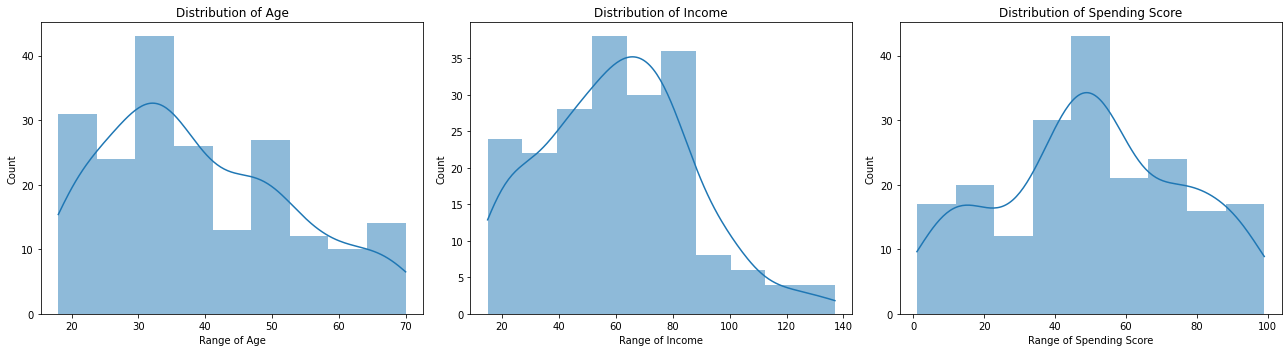

In [22]:
# Create a figure and a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distribution of Age
sns.histplot(df['Age'], kde=True, edgecolor='none', ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Range of Age')
axes[0].set_ylabel('Count')

# Plot distribution of Annual Income
sns.histplot(df['Annual Income (k$)'], kde=True, edgecolor='none', ax=axes[1])
axes[1].set_title('Distribution of Income')
axes[1].set_xlabel('Range of Income')
axes[1].set_ylabel('Count')

# Plot distribution of Spending Score
sns.histplot(df['Spending Score (1-100)'], kde=True, edgecolor='none', ax=axes[2])
axes[2].set_title('Distribution of Spending Score')
axes[2].set_xlabel('Range of Spending Score')
axes[2].set_ylabel('Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


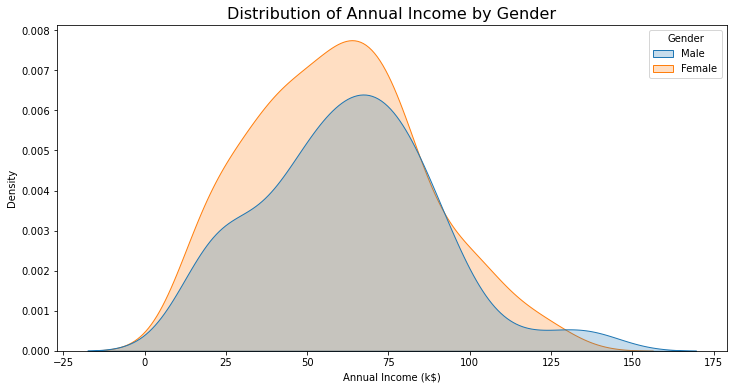

In [23]:
#Distribution of Annual Income by Gender
plt.figure(figsize=(12, 6))
sns.kdeplot(df['Annual Income (k$)'], shade=True, hue=df['Gender'])
plt.title("Distribution of Annual Income by Gender", fontsize=16)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Density")
plt.show()

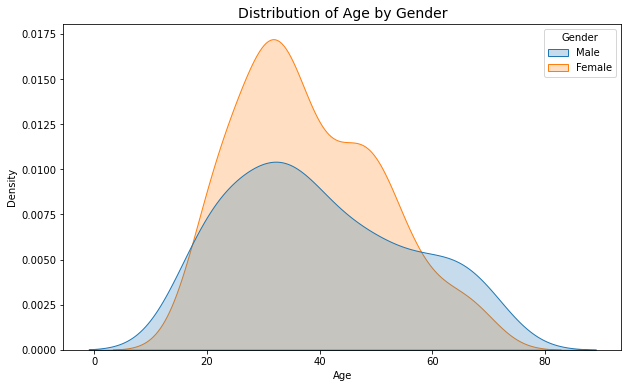

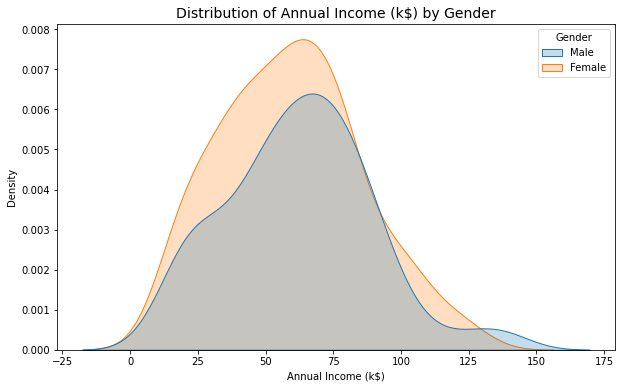

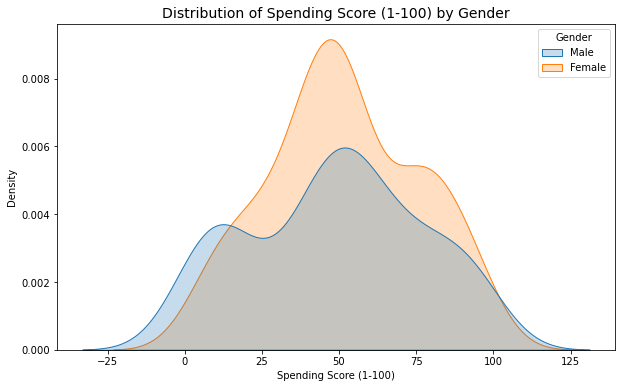

In [24]:
#Density Plots of Age, Annual Income, and Spending Score by Gender
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for i in columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[i], shade=True, hue=df['Gender'])
    plt.title(f"Distribution of {i} by Gender", fontsize=14)
    plt.xlabel(i)
    plt.ylabel('Density')
    plt.show()

In [25]:
#Customer Count by Gender
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

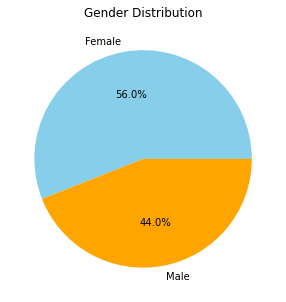

In [26]:
#Gender Distribution of Customers
gp = df.groupby('Gender').size()

plt.figure(figsize=(5,5))
gp.plot(kind='pie',subplots=True,colors=['skyblue','orange'],labels=['Female','Male'],autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

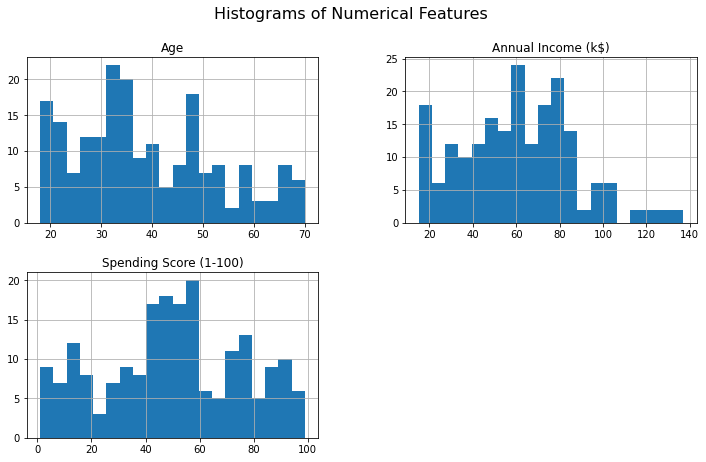

In [27]:
#Histograms of Numerical Features in Customer Data
num_cols = df.drop(columns=['CustomerID'])

num_cols.hist(figsize=(12, 7), bins=20, edgecolor='none')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()

<Figure size 864x432 with 0 Axes>

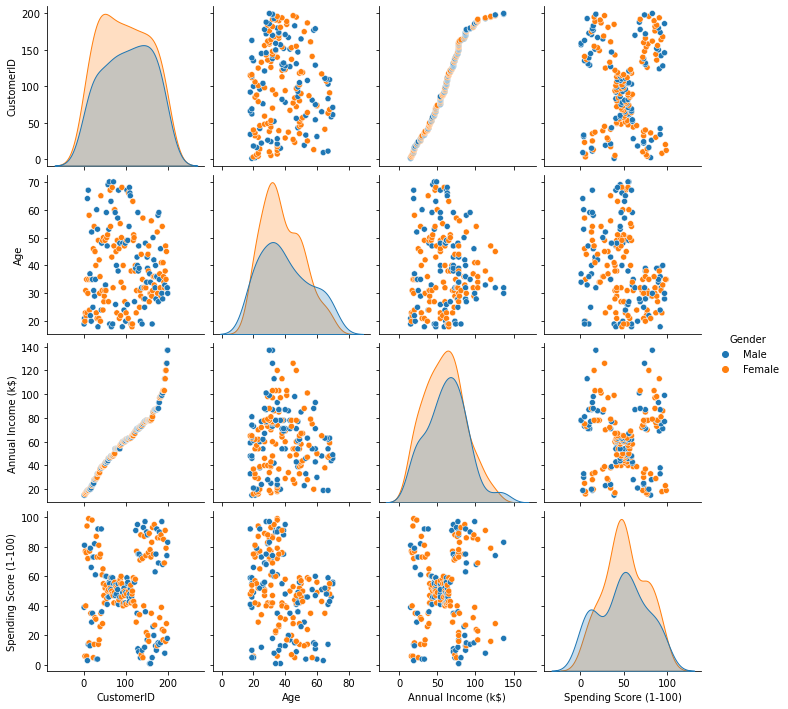

In [32]:
#Pairwise Relationships of Features Colored by Gender
plt.figure(figsize=(12, 6))
sns.pairplot(df, hue='Gender')
plt.show()

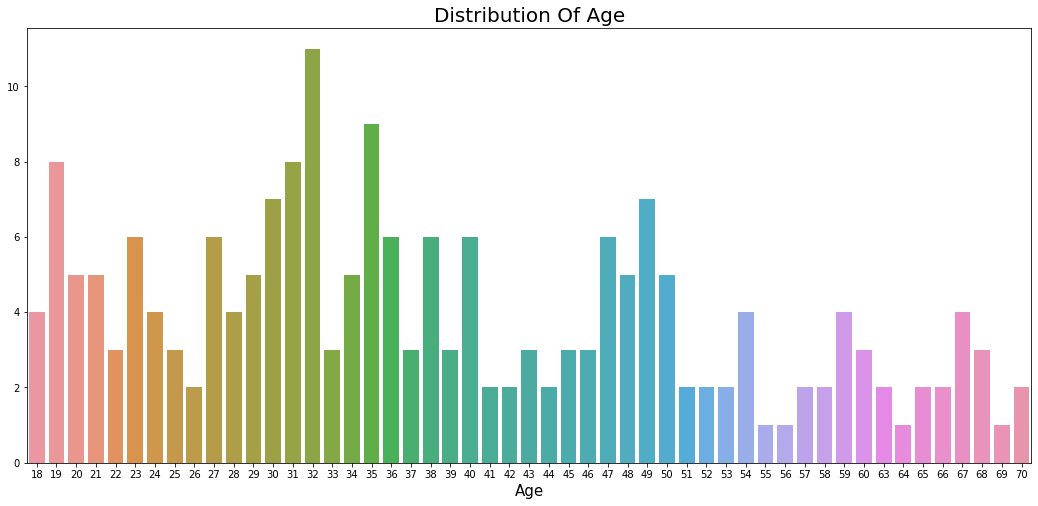

In [33]:
#Distribution of Customer Ages
plt.figure(figsize=(18,8))
sns.countplot(df['Age'])
plt.title('Distribution Of Age',fontsize='20')
plt.xlabel('Age',fontsize='15')
plt.ylabel('')
plt.show()

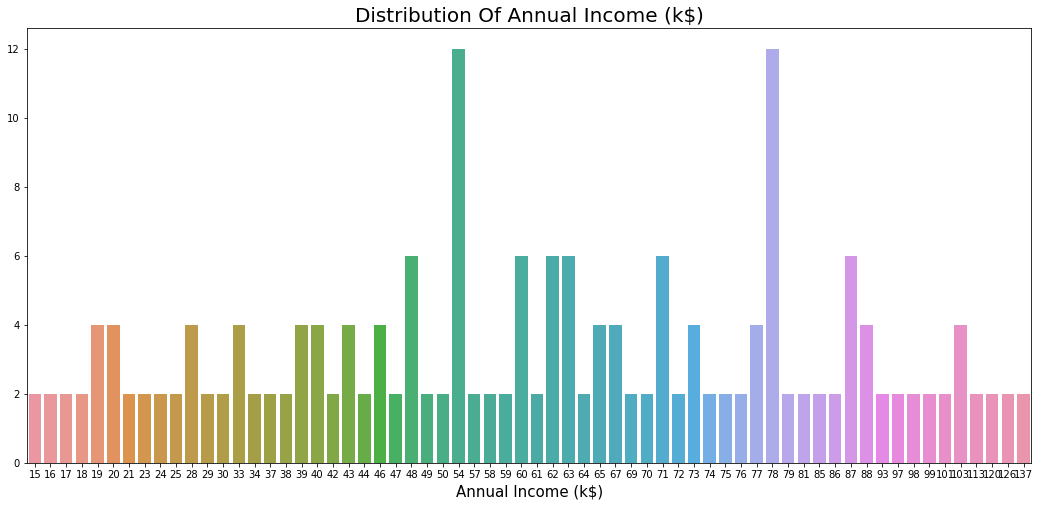

In [34]:
plt.figure(figsize=(18,8))
sns.countplot(df['Annual Income (k$)'])
plt.title('Distribution Of Annual Income (k$)',fontsize='20')
plt.xlabel('Annual Income (k$)',fontsize='15')
plt.ylabel('')
plt.show()

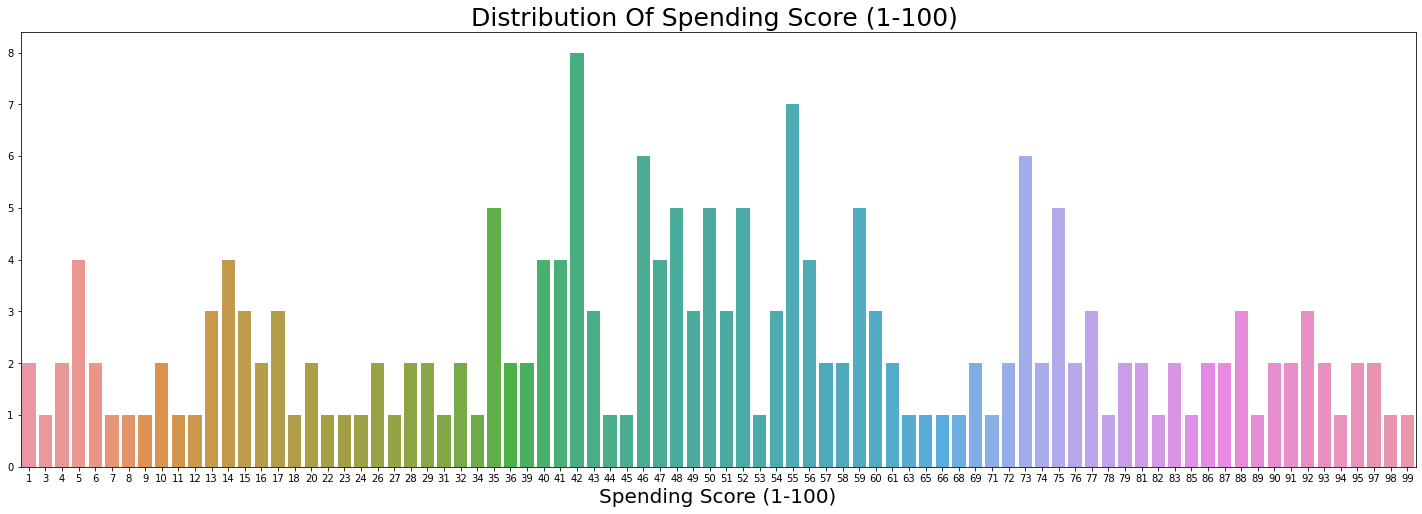

In [35]:
#Distribution of Annual Income (k$) Among Customers
plt.figure(figsize=(25,8))
sns.countplot(df['Spending Score (1-100)'])
plt.title('Distribution Of Spending Score (1-100) ',fontsize='25')
plt.xlabel('Spending Score (1-100)',fontsize='20')
plt.ylabel('')
plt.show()

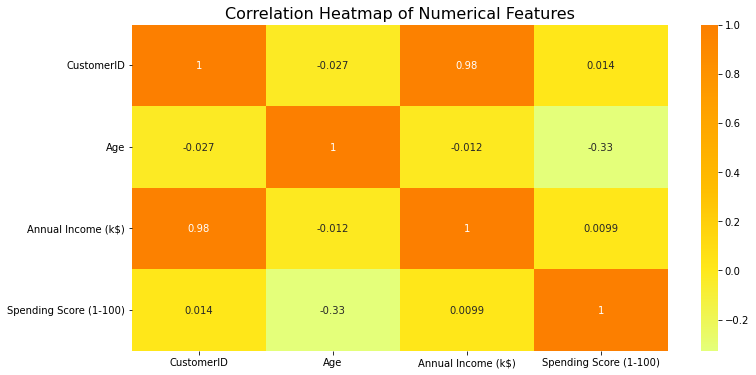

In [36]:
#Correlation Heatmap of Numerical Features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), cmap='Wistia', annot=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

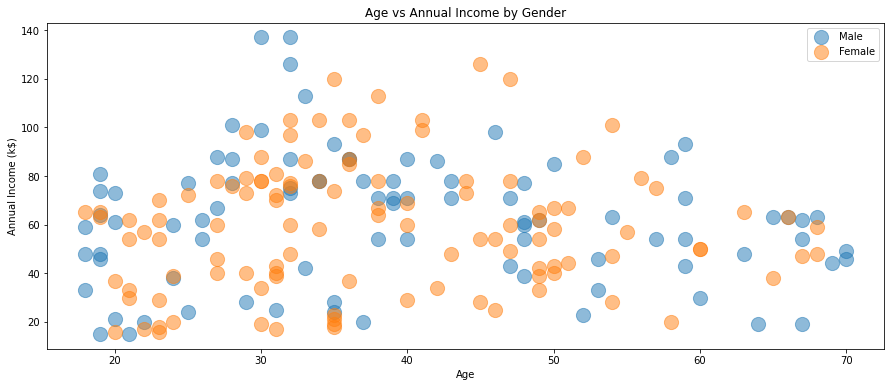

In [37]:
# Age vs. Annual Income by Gender
plt.figure(figsize=(15,6))
for gender in ['Male','Female']:
    plt.scatter(x='Age',y='Annual Income (k$)',data = df[df['Gender'] == gender],s = 200, alpha = 0.5, label = gender)
    
plt.title('Age vs Annual Income by Gender')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()

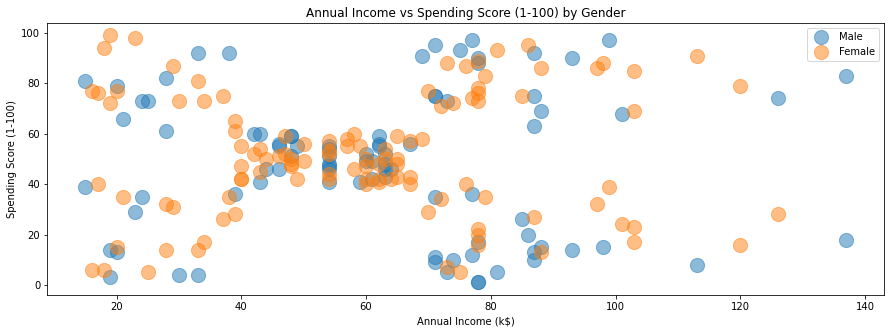

In [38]:
#Annual Income vs. Spending Score by Gender
plt.figure(figsize=(15,5))
for gender in ['Male','Female']:
    plt.scatter(x='Annual Income (k$)',y='Spending Score (1-100)',data = df[df['Gender'] == gender],
                s = 200,alpha = 0.5, label = gender)
    
plt.title('Annual Income vs Spending Score (1-100) by Gender')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

# K-means Clustering

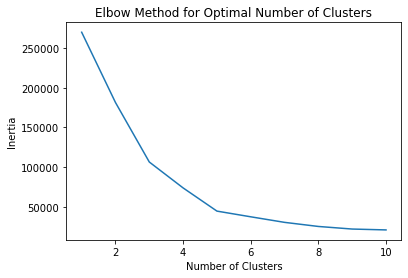

In [39]:
#Elbow Method for Optimal Number of Clusters
k = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    k.append(kmeans.inertia_)

plt.title("Elbow Method for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.plot(range(1,11),k)
plt.show()

In [40]:
#K-Means Clustering Assignment of Customer Segments
clustering = KMeans(n_clusters=5)
clustering.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] = clustering.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Spending and Income Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


<AxesSubplot:title={'center':'Customer Segmentation Based on Annual Income and Spending Score'}, xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

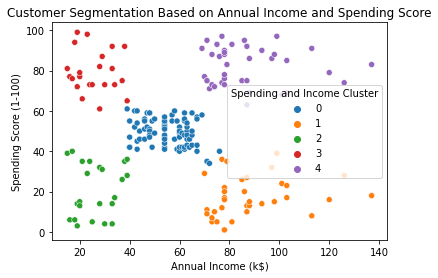

In [41]:
#Customer Segmentation Based on Annual Income and Spending Score
plt.title("Customer Segmentation Based on Annual Income and Spending Score")
plt.figure(1,figsize=(15,8))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')

In [42]:
#Cluster Centers for K-Means Segmentation
centers = pd.DataFrame(clustering.cluster_centers_)
centers.columns = ['X','Y']

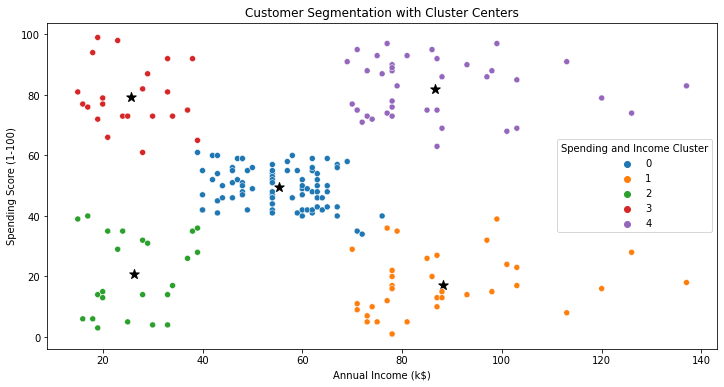

In [49]:
#Customer Segmentation with Cluster Centers
plt.figure(1,figsize=(12,6))
plt.scatter(x=centers['X'],y=centers['Y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.title("Customer Segmentation with Cluster Centers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [47]:
#Gender Distribution Across Spending and Income Clusters
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.592593,0.407407
1,0.457143,0.542857
2,0.608696,0.391304
3,0.590909,0.409091
4,0.538462,0.461538


In [45]:
# Average Age, Annual Income, and Spending Score by Cluster
df.groupby('Spending and Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205
